Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description**:

   * Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
   * X1 = my order was delivered on time
   * X2 = contents of my order was as I expected
   * X3 = I ordered everything I wanted to order
   * X4 = I paid a good price for my order
   * X5 = I am satisfied with my courier
   * X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import random
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score


In [2]:
data = pd.read_csv("ACME-HappinessSurvey2020.csv")
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.columns = ['happinessStatus', 'onTime', 'expectedContents', 
                'allOrdered', 'goodPrice', 'orderSatisfication', 'easyOrdering']
data.head()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Visualize the data

In [4]:
data.describe()

,happinessStatus,onTime,expectedContents,allOrdered,goodPrice,orderSatisfication,easyOrdering
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
def resultsReport(actual, predictions) :
    
    # Print F1 Score
    print('F1 Score ', f1_score(actual, predictions))
    
    # Visualize classification report with precision, recall and F1 score
    print(classification_report(actual, predictions))

    # Create Confusion matrix vector
    confMatrix = confusion_matrix(actual, predictions)
    dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])

    # Plot Confusion matrix
    sn.heatmap(dfConfMatrix, annot = True)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
def analyzeAttribute(data, colName) :
    # Display Average
    print("Average " + colName + " value: ", data[colName].mean())
    
    # Plot histogram
    bins = np.arange(1,7) - 0.5
    plt.hist(data[colName], bins)
    plt.title(colName)
    plt.show()

Average onTime value:  4.333333333333333


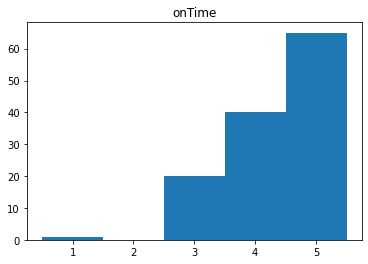

Average expectedContents value:  2.5317460317460316


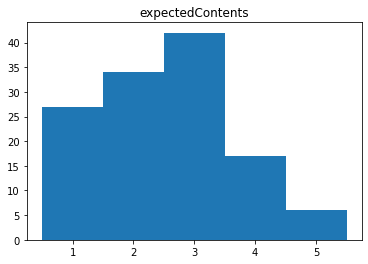

Average allOrdered value:  3.3095238095238093


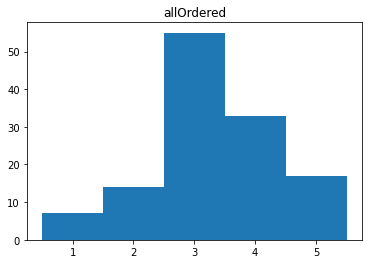

Average goodPrice value:  3.746031746031746


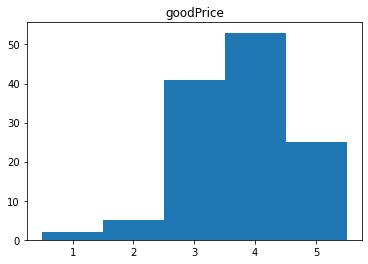

Average orderSatisfication value:  3.6507936507936507


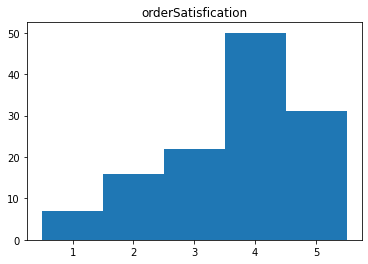

Average easyOrdering value:  4.253968253968254


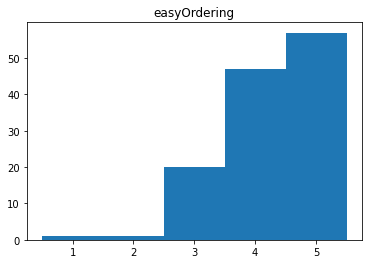

In [7]:
for i in range(1,7):
    analyzeAttribute(data, data.columns[i])

### Preprocess Data

In [8]:
X = data.drop(columns="happinessStatus")
y =data["happinessStatus"]


# split the data into training and testing data 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,
                                                 random_state=0)



In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 6), (26, 6), (100,), (26,))

### Training Different Models

#### 1) K Nearest Neighbours(KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
KNN = KNeighborsClassifier(n_neighbors =10)

# fit the model
KNN =KNN.fit(X_train, y_train)



Accuracy score to test set: 0.73

F1 Score  0.7407407407407408
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



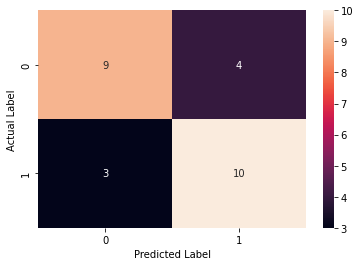

In [11]:
y_pred_knn = KNN.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_knn),2)))
resultsReport(y_test, y_pred_knn)

### Hyperparameter tuning

In [12]:
# Hyperparameters list
n_neighbors = range(1,20)
weights = ['uniform', 'distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
leafSize = range(1,30)
power = [1,2]

# Initialize model tracking variables
bestScore = 0
hyperParameterString = ''

# Loop through combinations of hyperparameters
for neigh in n_neighbors :
    for weight in weights :
        for alg in algo :
            for leaf in leafSize :
                for p in power:
                    # Create model with hyperparameter set
                    KNN = KNeighborsClassifier(n_neighbors = neigh,
                                               weights = weight,
                                               algorithm = alg,
                                               leaf_size = leaf,
                                               p = p)
                    # Fit model to training data
                    KNN = KNN.fit(X_train, y_train)

                    # Make predictions on test data
                    yPredict = KNN.predict(X_test)
                    
                    # Check if model scores better than any previous model
                    if f1_score(y_test, y_pred_knn) > bestScore :
                        # Update best score
                        bestScore = f1_score(y_test, y_pred_knn)
                        # Update hyperparameter String to keep track 
                        hyperParameterString = str(neigh) + '_' + weight + '_' + alg + '_' + str(leaf) + '_' + str(p)
                        



# Display results
print(bestScore)
print(hyperParameterString)

0.7407407407407408
1_uniform_auto_1_1



Accuracy score to test set: 0.73

F1 Score  0.7741935483870968
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.67      0.92      0.77        13

    accuracy                           0.73        26
   macro avg       0.77      0.73      0.72        26
weighted avg       0.77      0.73      0.72        26



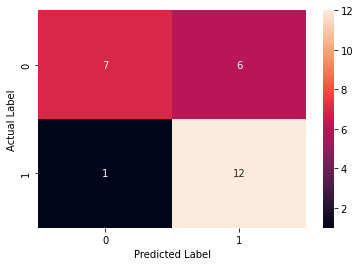

In [13]:
KNN =KNeighborsClassifier(n_neighbors=14,
                         weights="uniform",
                         algorithm="auto",
                         leaf_size=25,
                         p=1)

# fit the model
KNN =KNN.fit(X_train, y_train)

# predict
y_pred_knn =KNN.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_knn),2)))
# show result
resultsReport(y_test, y_pred_knn)

### 2. Support Vector Machine (SVM)


Accuracy score to test set: 0.5

F1 Score  0.5517241379310345
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



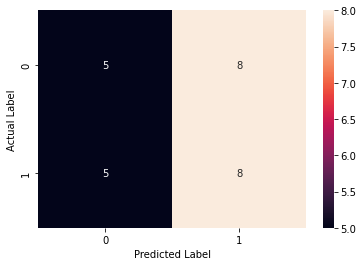

In [14]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create the model
SVM_clf =Pipeline([("scale", StandardScaler()),
              ("SVM", svm.SVC())])

# fit the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# make prediction on test data
y_pred_svm = SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm),2)))
resultsReport(y_test, y_pred_svm)


### Hyperparameter tuning for SVM

In [15]:
# SVM
# Hyper parameter options
kernelType = ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
degree = [1, 2, 3, 4] # Only applicable for kernel = poly
gamma = ['scale', 'auto'] # Only applicable for kernel = rbf poly or sigmoid

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

# Loop through hyperparameters and create specific models
for k in kernelType :
    for d in degree :
        for g in gamma :
            
            # Create models with hyper parameter set
            SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                              ('SVM', svm.SVC(kernel=k, degree=d, gamma=g))])
            # Train Model
            SVM_clf  = SVM_clf.fit(X_train, y_train)
            
            # Make predictions on test data set
            y_pred_svm = SVM_clf.predict(X_test)
            
            # Check if model produced a score better than the previous best
            if f1_score(y_test, y_pred_knn) > bestScore :
                # Update best score tracking variable
                bestScore = f1_score(y_test, y_pred_svm)
                # Update hyperparameter string to keep track of settings that produced the best model
                hyperParameterString = k + '_' + str(d) + '_' + g

# Display best model result
print(bestScore)
print(hyperParameterString)

0.8000000000000002
linear_1_scale



Accuracy score to test set: 0.77

F1 Score  0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



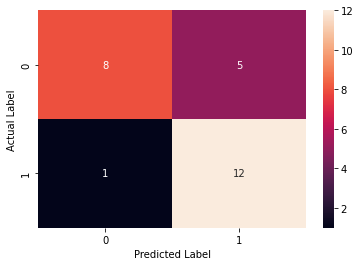

In [16]:
SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_pred_svm =SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm),2)))
resultsReport(y_test, y_pred_svm)

### 3. Logistic regression


Accuracy score to test set: 0.62

F1 Score  0.6875
              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



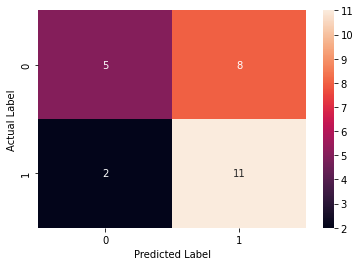

In [17]:
from sklearn.linear_model import LogisticRegression
# create model
logReg = LogisticRegression(max_iter=10000000)

# fit the model
logReg=logReg.fit(X_train, y_train)

# predict the model
y_pred_lg =logReg.predict(X_test)

print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_lg),2)))
resultsReport(y_test, y_pred_lg)

### 4. Decision Tree


Accuracy score to test set: 0.5

F1 Score  0.48000000000000004
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



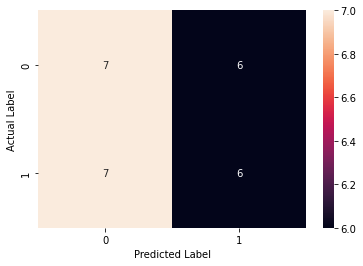

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_dt  =tree.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_dt),2)))
resultsReport(y_test, y_pred_dt)

### Decision Tree Hyperparameter Tuning

In [19]:
# Decision Tree
# Hyperparameter options
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(3,10)

# Performance trackign variables
bestScore = 0
hyperParameterString = ''

for c in criterion :
    for s in splitter :
        for m in max_depth :
            tree = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m)
            tree = tree.fit(X_train, y_train)
            
            y_pred_dt = tree.predict(X_test)
            
            if f1_score(y_test, y_pred_dt) > bestScore :
                bestScore = f1_score(y_test, y_pred_dt)
                hyperParameterString = c + '_' + s + '_' + str(m)
                
print(bestScore)
print(hyperParameterString)

0.7142857142857142
gini_random_5



Accuracy score to test set: 0.42

F1 Score  0.5161290322580646
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.44      0.62      0.52        13

    accuracy                           0.42        26
   macro avg       0.41      0.42      0.40        26
weighted avg       0.41      0.42      0.40        26



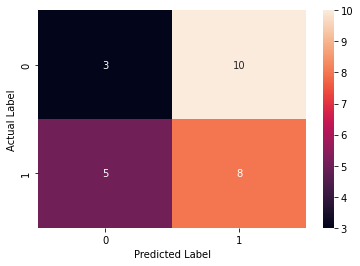

In [20]:
tree = DecisionTreeClassifier(criterion="entropy",
                             splitter="random",
                             max_depth=4)
tree =tree.fit(X_train, y_train)
y_pred_dt=tree.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_dt),2)))
resultsReport(y_test, y_pred_dt)

### 5. Random Forest

The Accuracy is : 0.5769230769230769


Classification report:
               precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26

F1 Score  0.6206896551724138
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



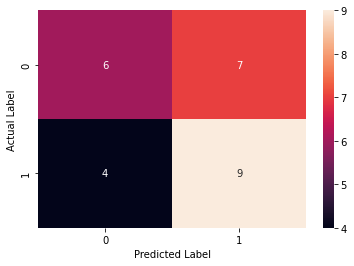

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Create Random Forest classifier with default parameters
clf = RandomForestClassifier(n_estimators=8)
                             

# Fit model to the train set
clf.fit(X_train, y_train)

# Predict values from the test set
y_pred_rf= clf.predict(X_test)
acc_RFC = accuracy_score(y_test, y_pred_rf)

# Accuracy score and classification report of the model
print('The Accuracy is : {}\n\n'.format(acc_RFC) )
print('Classification report:\n',classification_report(y_test, y_pred_rf))
resultsReport(y_test, y_pred_rf)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Create parameters list
param_dist = {'n_estimators':[200,300], 
              'max_depth':[6,8], 
              'min_samples_leaf':[0.1,0.2], 
              'max_features':['log2','sqrt']}

# Create Random Forest classifier for Grid Search and fit it to train set
tree_clf = RandomForestClassifier()
tree_cv = GridSearchCV(tree_clf, param_dist, cv = 3, verbose = 1, scoring = 'accuracy',n_jobs = 4)
tree_cv.fit(X_train, y_train)

# Print parameters of the model
print(tree_cv.best_params_)
print(tree_cv.best_score_)
print(tree_cv.best_estimator_)

# Print accuracy score of the model to test set
y_pred = tree_cv.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_rf),2)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 300}
0.6298276886512181
RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=0.1,
                       n_estimators=300)

Accuracy score to test set: 0.58



In [24]:
from sklearn.model_selection import cross_val_predict

predicted_y = cross_val_predict(KNN, X, y, cv=10)
print(predicted_y)

[0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1]


**Goal(s):**

Predict if a customer is happy or not based on the answers they give to questions asked.

**Success Metrics:**

* Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

* Try to submit your working solution as soon as possible. The sooner the better.

**Support Vector Machine (SVM)** give the highest accuracy and F1 scores, so I chose this model.





Accuracy score to test set: 0.77

F1 Score  0.8000000000000002
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.71      0.92      0.80        13

    accuracy                           0.77        26
   macro avg       0.80      0.77      0.76        26
weighted avg       0.80      0.77      0.76        26



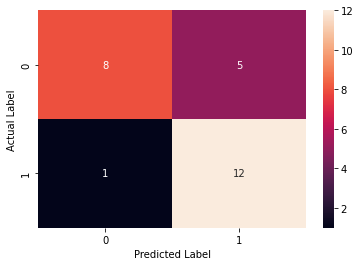

In [26]:
SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_pred_svm =SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm),2)))
resultsReport(y_test, y_pred_svm)

**Bonus(es):**

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

### Finding feature importances

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures =SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

In [28]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns =pd.DataFrame(X.columns)

In [29]:
featureScores =pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns= ["Specs", "Score"]

featureScores

,Specs,Score
0,onTime,1.449041
1,expectedContents,0.036161
2,allOrdered,0.900104
3,goodPrice,0.106194
4,orderSatisfication,2.273286
5,easyOrdering,0.541070


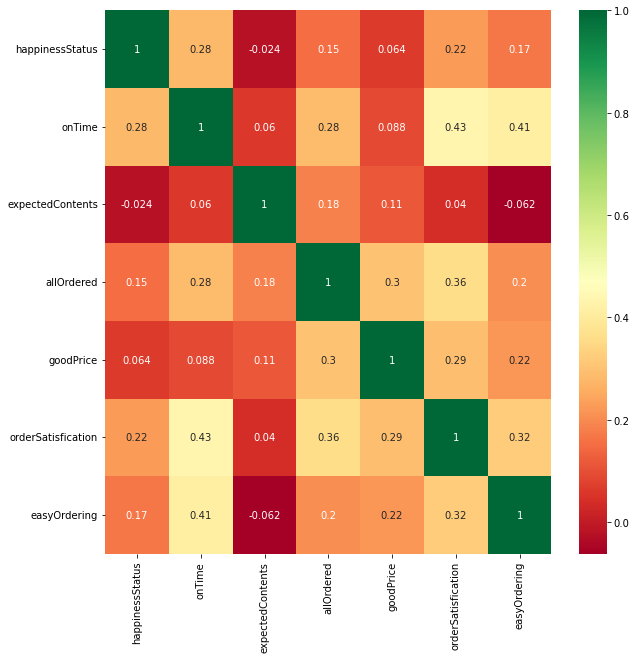

In [32]:
import seaborn as sns

corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
# plot heatmap
g =sns.heatmap(data[top_corr_features].corr(), annot=True, cmap ="RdYlGn")